# 1. Data Collection Part  -  Redfin website

#### Importing Libraries

In [1]:
from urllib.request import urlopen
import requests 
from bs4 import BeautifulSoup as BS
import re
import pandas as pd
import numpy as np
from collections import defaultdict
import seaborn as sns

#### Creating a dictionary of HTTP request headers

In [2]:
req_headers = {
    'accept': '*/*',
    'accept-encoding': 'gzip, deflate, br',
    'accept-language': 'en-US,en;q=0.8',
    'upgrade-insecure-requests': '1',
    'authority': 'www.redfin.com',
    'user-agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/105.0.0.0 Safari/537.36',
    'cookie': 'RF_BROWSER_ID=L60AjcauTBebcYlIR2U4kw; G_ENABLED_IDPS=google; searchMode=1; sortOrder=1; sortOption=special_blend; collapsedMapView=1; RF_BUSINESS_MARKET=2; g_state={"i_p":1664477071453,"i_l":3}; RF_LDP_VIEWS_FOR_PROMPT=%7B%22viewsData%22%3A%7B%2209-18-2022%22%3A%7B%22156376334%22%3A2%2C%22156597405%22%3A1%2C%22156758795%22%3A1%2C%22157099478%22%3A1%2C%22157135189%22%3A1%2C%22157151930%22%3A1%2C%22157161427%22%3A3%7D%2C%2209-19-2022%22%3A%7B%22153865147%22%3A1%2C%22157119319%22%3A2%2C%22157168473%22%3A1%7D%2C%2209-20-2022%22%3A%7B%22156448970%22%3A1%2C%22156904928%22%3A1%7D%2C%2209-22-2022%22%3A%7B%22157144246%22%3A1%2C%22157190844%22%3A2%2C%22157210293%22%3A1%2C%22157227537%22%3A1%2C%22157230771%22%3A1%2C%22157353619%22%3A1%7D%2C%2209-25-2022%22%3A%7B%22156936145%22%3A1%2C%22157527548%22%3A1%7D%7D%2C%22expiration%22%3A%222024-09-17T20%3A50%3A26.681Z%22%2C%22totalPromptedLdps%22%3A0%7D; RF_LISTING_VIEWS=156936145.157527548.157227537.157144246.157210293.157230771.157353619.157190844.156904928.156448970.157168473.157119319.153865147.156376334.157161427.157135189.157099478.156597405.156758795.157151930; RF_LAST_DP_SERVICE_REGION=1077; RF_LAST_SEARCHED_CITY=San%20Bruno; userPreferences=parcels%3Dtrue%26schools%3Dfalse%26mapStyle%3Ds%26statistics%3Dtrue%26agcTooltip%3Dfalse%26agentReset%3Dfalse%26ldpRegister%3Dfalse%26afCard%3D2%26schoolType%3D0%26lastSeenLdp%3DnoSharedSearchCookie%26viewedSwipeableHomeCardsDate%3D1664165946420; RF_UNBLOCK_ID=wCqEglla; AKA_A2=A; ak_bmsc=57A850EC50D2954AAA0419C6D177A935~000000000000000000000000000000~YAAQ0JTYF5ZIgpaDAQAAKIgDnxGfYe1YNwTJw6mekKkcE5nssQDSrdsUFiwwxWyVrpvyvhnhncenIYgSmII9TwxluJVvEbu/tSUA8+/x3EM6yHei8eKMGAMPKEXs+xIR8u8Hf3k6s3HacFNu1qkh2h07TrJvIDAWTDrhoL6OcfAp7/CbcwQpKp7Pocp2h2hPgkz67zj0Z3r9InkPnvnNRNIL/t3BvTDL2PxnQJrTfrkhfIaitiKoHeF7QwWsMq1j+SrBc5eTQTA9sbPGaAN+0EGk9EE+0jOrKIv8qAjdnUzUCee09zkdlDSciEsp6laLxBYdYn12Nzkg9hCdSyYLvDA3a4icF9GO7BpK21KF8H6nEnFOQZRKVVYNVkbYfLda7ywMou4gLIpI9pw=; RF_CORVAIR_LAST_VERSION=438.2.1; RF_BROWSER_ID_GREAT_FIRST_VISIT_TIMESTAMP=2022-10-03T11%3A02%3A37.559025; RF_BID_UPDATED=1; bm_mi=93FC1225292EA26E5BF28146B44094DB~YAAQ0JTYF/BLgpaDAQAAEp0DnxGHhDCs8mc21i2Dx+0ew80H+sc60/eEiX1lmxobxK/NRjrLVtcm4UEoauvXlXiAl8+Z1WaiNvLo0ZJBgCCZCvVxGCC2E3xVkl81ndIvalVW/U/d1nPOOK3XFuLTSWrMgBiny6GOOETBYHm6DyYPb6Ntoq3ksWcXw8DSuhJ4fDN85gYSsPLJyoEDoILSXl2rPCLSOtTso6GDk0IEcNImEr1HdWiaEtFTNl7iS5tE84eBj+2KFID+B1M+TNDpAaufrXq1HOIxe8WFuBLa/NRF56c9uco/l2df9ynZ~1; RF_LAST_NAV=1; audS=t; FEED_COUNT=%5B%2210%22%2C%22f%22%5D; RF_BROWSER_CAPABILITIES=%7B%22screen-size%22%3A3%2C%22events-touch%22%3Afalse%2C%22ios-app-store%22%3Afalse%2C%22google-play-store%22%3Afalse%2C%22ios-web-view%22%3Afalse%2C%22android-web-view%22%3Afalse%7D; RF_VISITED=true; bm_sv=CD12C71B261FDC72BDB3D61405E55061~YAAQ0JTYF+tRgpaDAQAALMcDnxHjrt/ADbihWy6+dkJ3T8DDBOsnmekzaIYfQH2v4SiuPvZn/+xxnjrtdCZj1SzNSp2A8btPLdYNYWPccr8pbh4DSGuhMicHQtxH7XKiD86A8B5aHIQMI2UqK9WWzXrmMahkEBOR9tsnLuclJZaMV/hkqs5qecN25o/+r+W+RB0TPyZnlYPGRveIs074kfnwyTc5f4VtAkgNANpBGqzow8WBIgKn5/C706Pl7R4n~1',
    'referer': 'https://www.redfin.com/',
    'sec-ch-ua': '"Google Chrome";v="105", "Not)A;Brand";v="8", "Chromium";v="105"',
    'sec-ch-ua-mobile': '?0',
    'sec-ch-ua-platform': '"macOS"',
    'sec-fetch-dest': 'empty',
    'sec-fetch-mode': 'cors',
    'sec-fetch-site': 'same-origin'
}

#### This code retrieves the HTML content of a webpage from the specified URL and parses it using BeautifulSoup library

In [3]:
url = "https://www.redfin.com/state/California"
r = requests.Session().get(url, headers=req_headers)
soup = BS(r.content, 'html.parser')
print(soup.prettify()  )

<!DOCTYPE html>
<html lang="en">
 <head>
  <!-- OptanonConsentNoticeStart -->
  <!-- OneTrust Cookies Consent Notice start for redfin.com -->
  <script charset="UTF-8" data-domain-script="7e5bc3d6-ef20-4760-aa0d-c8df4649fae2" src="https://cdn.cookielaw.org/scripttemplates/otSDKStub.js" type="text/javascript">
  </script>
  <script type="text/javascript">
   function OptanonWrapper() {
					// Get OnetrustActiveGroups ids
					var otActiveGroups = new Set(OnetrustActiveGroups.split(","));
					//Delete cookies
					Optanon.GetDomainData().Groups.forEach((group) => {
						//Check if CustomGroupId matches
						if(group.CustomGroupId && !otActiveGroups.has(group.CustomGroupId)){
						   group.FirstPartyCookies.forEach((cookie) => {
							   eraseCookie(cookie.Name);
						   });
						}
					});

					function eraseCookie(cookieName) {
						if(window.localStorage) {
							window.localStorage.removeItem(cookieName);
						}

						//Delete root path cookies
						var domainNameArray =

#### Extracting all href attributes from anchor tags in a parsed HTML content

In [4]:
all_urls = [a['href'] for a in soup('a')  if a.has_attr('href')]
all_urls

['/',
 '/houses-near-me',
 '/rentals',
 '/feed',
 '/myredfin/favorites',
 '/premier',
 '/sell-a-home/seller-consultation/address?inquirySource=285',
 '/rentals/list-my-home-for-rent',
 'https://redfin.onelink.me/iy7h/?pid=redfin&af_channel=mobile-web-organic&c=mobile-menu',
 '/',
 '/myredfin/saved-searches',
 '/selling-options',
 '/myredfin/owner-dashboard',
 '/myredfin/openhouses',
 '/myredfin/tours',
 '/myredfin/agent',
 '/mortgage-menu',
 '/careers/real-estate',
 '/myredfin/alerts-settings',
 'tel:1-844-759-7732',
 'tel:1-844-759-7732',
 '/houses-near-me',
 '/rentals',
 '/why-sell?inquirySource=484',
 '/premier',
 '/mortgage-rates?context=3',
 '/real-estate-agents',
 '/feed',
 '/state/California/housing-market',
 'https://www.redfin.com/city/17420/CA/San-Jose',
 'https://www.redfin.com/city/17420/CA/San-Jose',
 'https://www.redfin.com/city/6671/CA/Fremont',
 'https://www.redfin.com/city/6671/CA/Fremont',
 'https://www.redfin.com/city/14986/CA/Pleasanton',
 'https://www.redfin.com/ci

#### Filtering and extracting the URLs from a list of all URLs that match the regular expression and storing them in a list after removing duplicates

In [5]:
regex = r"https://www.redfin.com/county/?"
good_urls = [url for url in all_urls if re.match(regex, url)]
good_urls = list(set(good_urls))
good_urls

['https://www.redfin.com/county/351/CA/Sonoma-County',
 'https://www.redfin.com/county/345/CA/Santa-Clara-County',
 'https://www.redfin.com/county/333/CA/Placer-County',
 'https://www.redfin.com/county/343/CA/San-Mateo-County',
 'https://www.redfin.com/county/312/CA/Fresno-County',
 'https://www.redfin.com/county/358/CA/Ventura-County',
 'https://www.redfin.com/county/346/CA/Santa-Cruz-County',
 'https://www.redfin.com/county/342/CA/San-Luis-Obispo-County',
 'https://www.redfin.com/county/330/CA/Napa-County',
 'https://www.redfin.com/county/335/CA/Riverside-County',
 'https://www.redfin.com/county/338/CA/San-Bernardino-County',
 'https://www.redfin.com/county/311/CA/El-Dorado-County',
 'https://www.redfin.com/county/309/CA/Contra-Costa-County',
 'https://www.redfin.com/county/303/CA/Alameda-County',
 'https://www.redfin.com/county/336/CA/Sacramento-County']

#### Creating a list of URLs for real estate properties in the San Francisco Bay Area by filtering out URLs containing county names not in the list of Bay Area counties

In [6]:
bayarea_county_list = []
bayarea_counties = ["Alameda-County","Santa-Clara-County","San-Mateo-County","Contra-Costa-County", "Napa-County", "Marin-County", "Sonoma-County", "Solano-County", "San-Francisco-County"]
for url in good_urls:
    if url.split("/")[6] in bayarea_counties:
        bayarea_county_list.append(url)
bayarea_county_list

['https://www.redfin.com/county/351/CA/Sonoma-County',
 'https://www.redfin.com/county/345/CA/Santa-Clara-County',
 'https://www.redfin.com/county/343/CA/San-Mateo-County',
 'https://www.redfin.com/county/330/CA/Napa-County',
 'https://www.redfin.com/county/309/CA/Contra-Costa-County',
 'https://www.redfin.com/county/303/CA/Alameda-County']

#### Generating a list of links for Redfin pages of the Bay Area counties, including multiple pages for each county, and printing the total number of links and the list of links

In [13]:
bayarea_county_page_links =[]
for c_l in bayarea_county_list:
    bayarea_county_page_links.append(c_l)
    for i in range(2,6):
        bayarea_county_page_links.append(c_l+'/page-'+str(i))
print(len(bayarea_county_page_links))        
print(bayarea_county_page_links)  

30
['https://www.redfin.com/county/351/CA/Sonoma-County', 'https://www.redfin.com/county/351/CA/Sonoma-County/page-2', 'https://www.redfin.com/county/351/CA/Sonoma-County/page-3', 'https://www.redfin.com/county/351/CA/Sonoma-County/page-4', 'https://www.redfin.com/county/351/CA/Sonoma-County/page-5', 'https://www.redfin.com/county/345/CA/Santa-Clara-County', 'https://www.redfin.com/county/345/CA/Santa-Clara-County/page-2', 'https://www.redfin.com/county/345/CA/Santa-Clara-County/page-3', 'https://www.redfin.com/county/345/CA/Santa-Clara-County/page-4', 'https://www.redfin.com/county/345/CA/Santa-Clara-County/page-5', 'https://www.redfin.com/county/343/CA/San-Mateo-County', 'https://www.redfin.com/county/343/CA/San-Mateo-County/page-2', 'https://www.redfin.com/county/343/CA/San-Mateo-County/page-3', 'https://www.redfin.com/county/343/CA/San-Mateo-County/page-4', 'https://www.redfin.com/county/343/CA/San-Mateo-County/page-5', 'https://www.redfin.com/county/330/CA/Napa-County', 'https://w

#### Scraping all the links to real estate property listings in the Bay Area counties of California from Redfin website, and storing them in a dictionary of sets where each key represents a county name and its value is a set of all property URLs in that county

In [14]:
properties= defaultdict(set) 

for url in bayarea_county_page_links:    
    county_name = re.findall('CA/([^/]+)',url) # key       
    text = requests.get(url, headers=req_headers).text
    soup = BS(text,'html5lib')     
    county_text = soup.find('div',attrs={'id':'results-display'}) 
    all_links = [a['href'] for a in county_text('a') if a.has_attr('href')] 
    regex = r"^/CA" 
    for link in all_links:
        if re.match(regex,link):
            mlink = "https://www.redfin.com" + link
            properties[county_name[0]].add(mlink)

print(len(properties))
print(properties)

6
defaultdict(<class 'set'>, {'Sonoma-County': {'https://www.redfin.com/CA/Santa-Rosa/1830-Leafgreen-Dr-95405/home/2222621', 'https://www.redfin.com/CA/Sonoma/20745-Denmark-St-95476/home/182222443', 'https://www.redfin.com/CA/Glen-Ellen/6409-Enterprise-Rd-95442/home/40441308', 'https://www.redfin.com/CA/Santa-Rosa/121-Oakwood-Ln-95409/home/184286370', 'https://www.redfin.com/CA/The-Sea-Ranch/487-Drovers-Close-95497/home/2579221', 'https://www.redfin.com/CA/Petaluma/214-Jacquelyn-Ln-94952/home/22501745', 'https://www.redfin.com/CA/Rohnert-Park/4579-Harmony-Pl-94928/home/2594545', 'https://www.redfin.com/CA/Santa-Rosa/55-Coronado-Cir-95409/home/184309753', 'https://www.redfin.com/CA/Santa-Rosa/510-Todd-Rd-95407/home/2514384', 'https://www.redfin.com/CA/The-Sea-Ranch/37238-Schooner-Dr-95497/home/2579396', 'https://www.redfin.com/CA/Sonoma/22033-Bonness-Rd-95476/home/2534981', 'https://www.redfin.com/CA/Petaluma/1619-Northstar-Dr-94954/home/2568787', 'https://www.redfin.com/CA/Petaluma/30-

#### Scraping real estate data from the provided URLs and extracting information and storing this information in lists

In [15]:
# Creating empty lists for required parameters
State = []
County =[]
City = []
Street= []
Zipcode = []
Property_type = []
Status = []
Price = []
Year_built = []
Beds = []
Bath = []
Sqft = []
Acre = []
Lot_area = []
HOA_due = []
School_score = []
Walk_score = []
Bike_score = []
Garage_availibility = []
Redfin_estimate = []

for county in properties:   
    
    
    for prop in properties[county]:  
        
        County.append(county)
        
        html_text = requests.get(prop,headers=req_headers).text
        soup = BS(html_text,'html5lib')
        
        try:
            state_value = soup.find('div',attrs={'class':'dp-subtext'}).text.split(', ')[1].split(' ')[0]
        except:
            state_value = np.nan
        State.append(state_value)
        
        
        try:
            city_value = soup.find('div',attrs={'class':'dp-subtext'}).text.split(', ')[0]
        except:
            city_value = np.nan
        City.append(city_value)
        
    
        try:
            street_value = soup.find('div',attrs={'class':'street-address'}).text.split(',')[0]
        except:
            street_value = np.nan
        Street.append(street_value)
        
     
        try:
            zipcode_value = soup.find('div',attrs={'class':'dp-subtext'}).text.split(', ')[-1].split(' ')[-1]
            
        except:
            zipcode_value = np.nan
        Zipcode.append(zipcode_value) 
        
        
        try:
            property_value = soup.findAll('div',attrs={'class':'keyDetail font-weight-roman font-size-base'})
            for tag in property_value:
                if(tag.span.text == 'Property Type'):
                    property_type_value = tag.find('span',attrs={'class':'content text-right'}).text
        except:
            property_type_value = np.nan
        Property_type.append(property_type_value)       
        
        
        
        try:
            status_text = soup.findAll('div',attrs={'class':'keyDetail font-weight-roman font-size-base'})
            status =''
            for tag in status_text:
                if(tag.span.text=='Status'):
                    status = tag.find('span',attrs={'class':'DefinitionFlyoutLink inline-block underline clickable'})
                    if status == None:
                        status = tag.find('span',attrs={'class':'content text-right'})
        except:
            status=np.nan
        Status.append(status.text)     
        
        
        
        try:
            price_value = soup.find('div',attrs={'class':'statsValue'}).text.split('$')[1]
        except:
            price_value = np.nan
        Price.append(price_value)
        
        
        try:
            year_built_text = soup.findAll('div',attrs={'class':'keyDetail font-weight-roman font-size-base'})
            for tag in year_built_text:
                if(tag.span.text=='Year Built'):
                    year_built_value = int(tag.find('span',attrs={'class':'content text-right'}).text)
        except:
            year_built_value = np.nan
        Year_built.append(year_built_value)
                
        
        try:
            bed_value_str = soup.find('div',attrs={'data-rf-test-id':'abp-beds'}).text.split('B')[0]
            bed_value = int(bed_value_str)
        except:
            bed_value=np.nan
        Beds.append(bed_value)
        
        
        try:
            bath_value_str =soup.find('div',attrs ={'data-rf-test-id':'abp-baths'}).text.split('B')[0]
            bath_value = float(bath_value_str)
        except:
            bath_value = np.nan
        Bath.append(bath_value)
        
        
        try:
            sqft_value_str =soup.find('div',attrs ={'data-rf-test-id':'abp-sqFt'}).text.split('S')[0].replace(',','')
            sqft_value = float(sqft_value_str)
        except:
            sqft_value=np.nan
        Sqft.append(sqft_value)
        
        
        try:
            acre_value =soup.find('div',attrs ={'class':'stat-block sqft-section'}).text.split('A')[0]
        except:
            acre_value=np.nan
        Acre.append(acre_value)
        
        
        lot_area_value = None # Initialize lot_area_value with a default value
        try:
            lot_prop_text = soup.findAll('div',attrs={'class':'keyDetail font-weight-roman font-size-base'})
            for tag in lot_prop_text:
                if(tag.span.text=='Lot Size'):
                    lot_area_value = tag.find('span',attrs={'class':'content text-right'}).text
        except:
            lot_area_value = np.nan
        Lot_area.append(lot_area_value)

        
        try:
            hoa_text = soup.findAll('div',attrs={'class':'keyDetail font-weight-roman font-size-base'})
            hoa_due_value =''
            for tag in hoa_text:
                if(tag.span.text=='HOA Dues'):
                    hoa_due_value = tag.find('span',attrs={'class':'content text-right'}).text
        except:
            hoa_due_value = np.nan
        HOA_due.append(hoa_due_value)
        
        
        
        try:
            school_rating = max([rating.text[0] for rating in soup.findAll('div',attrs ={'class':'gs-rating-text'})])
        except:
            school_rating = np.nan
            
        School_score.append(school_rating)        
        
                
        
        try:
            walk_score_value = int(soup.find('div',attrs={'class':'transport-icon-and-percentage walkscore'}).text.split(' /')[0])
        except:
            walk_score_value = np.nan
        Walk_score.append(walk_score_value)
        
        
        
        try:
            bike_score_value = int(soup.find('div',attrs={'class':'transport-icon-and-percentage bikescore'}).text.split(' /')[0])
        except:
            bike_score_value = np.nan
        Bike_score.append(bike_score_value)
        

        
        try:
            garage_aval = soup.findAll('span',attrs={'class':'entryItemContent'})
            for tag in garage_aval:
                if("Garage" in tag.text):
                    value = 'Yes'
                    break
                else:    
                    value = 'No'
        except:   
             value = np.nan
        Garage_availibility.append(value)
        
        
        
        try:
            redfin_estimate_text = soup.findAll('div',attrs={'class':'keyDetail font-weight-roman font-size-base'})
            redfin_estimate_value =''
            for tag in redfin_estimate_text:
                if(tag.span.text =='Redfin Estimate'):
                    redfin_estimate_value = tag.find('span',attrs={'class':'content text-right'}).text.split('$')[1]
        except:
            redfin_estimate_value=np.nan
        Redfin_estimate.append(redfin_estimate_value)


#### Creating a Pandas DataFrame called "df" and filling it with data from the corresponding input variables

In [16]:
df=pd.DataFrame(data={'State':State,'County':County,
                      'City':City,'Street':Street,
                      'Zipcode':Zipcode,'Property_Type':Property_type,
                      'Status':Status,
                      'Price':Price,'Year_Built':Year_built,
                      'Beds':Beds,'Bath':Bath,'Sqft':Sqft,'Acre':Acre,
                      'Lot Area':Lot_area,'HOA Due':HOA_due,'School_rating':School_score,
                      'WalkScore':Walk_score,'Bike_Score':Bike_score,
                      'Garage_availability':Garage_availibility,
                      'Redfin_estimate':Redfin_estimate
                      
})                     
df

,State,County,City,Street,Zipcode,Property_Type,Status,Price,Year_Built,Beds,Bath,Sqft,Acre,Lot Area,HOA Due,School_rating,WalkScore,Bike_Score,Garage_availability,Redfin_estimate
0,CA,Sonoma-County,Santa Rosa,1830 Leafgreen Dr,95405,Single Family Residential,Active,"750,000",1961,3.0,2.0,1425.0,"1,425Sq Ft","7,022 Sq. Ft.",,6,58,57.0,Yes,"752,455"
1,CA,Sonoma-County,Sonoma,20745 Denmark Ct,95476,Multi-Family (2-4 Unit),Active,"11,500,000",2022,4.0,5.5,6005.0,"6,005Sq Ft",4.58 Acres,,NaN,27,38.0,Yes,
2,CA,Sonoma-County,Glen Ellen,6409 - 6411 Enterprise Rd,95442,Multi-Family (2-4 Unit),Active,"3,295,000",1983,6.0,5.0,4078.0,"4,078Sq Ft",22.68 Acres,,5,0,7.0,No,
3,CA,Sonoma-County,Santa Rosa,121 Oakwood Ln,95409,Mobile/Manufactured Home,Active,"130,000",1971,2.0,2.0,960.0,960Sq Ft,None,,7,56,64.0,No,"128,174"
4,CA,Sonoma-County,The Sea Ranch,487 Drovers Close,95497,Single Family Residential,Active,"1,175,000",1993,2.0,2.0,1849.0,"1,849Sq Ft",0.73 Acres,$292/month,4,0,3.0,Yes,"1,186,436"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1195,CA,Alameda-County,Emeryville,6363 Christie Ave #3007,94608,Condo,Active,"1,200,000",1984,2.0,1.5,1144.0,"1,144Sq Ft",5.14 Acres,$761/month,4,82,91.0,Yes,"1,200,093"
1196,CA,Alameda-County,Berkeley,2550 Dana St Unit 5B,94704,Co-op,New,"398,000",1962,1.0,1.0,700.0,700Sq Ft,0.25 Acres,$520/month,9,96,98.0,No,"398,015"
1197,CA,Alameda-County,Castro Valley,5022 Beacon Hill Dr,94552,Single Family Residential,New,"1,950,000",1970,4.0,2.5,3194.0,"3,194Sq Ft","10,880 Sq. Ft.",,9,43,25.0,Yes,"1,953,566"
1198,CA,Alameda-County,Dublin,5830 Midnight Pl Unit E,94568,Townhouse,New,"1,099,900",2020,3.0,2.0,1618.0,"1,618Sq Ft",None,$323/month,8,35,81.0,Yes,"1,104,430"


In [17]:
# Converting the dataframe to .csv file before cleaning the data
df.to_csv('Data_before_cleaning.csv')

## Data Cleaning

In [19]:
(df['Beds'].isna() & df['Bath'].isna()).sum()

127

#### Let's replace values of beds and bath where value is null value.

In [21]:
df = df.dropna(subset=['Beds', 'Bath'],how='all')

#### Replacing Bike_Score null values as 0

In [23]:
df['Bike_Score'].fillna(0,inplace=True)

/var/folders/xv/wf7kn7kn0m147kw_z5h7vr780000gn/T/ipykernel_71957/4061817991.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Bike_Score'].fillna(0,inplace=True)


#### We have removed properties where both beds and baths are 0. To deal with remaining null values in Individual columns of Beds & Baths, we will replace it with 0 since that means there is either no bedroom or no bathroom in that property

In [25]:
df['Beds'].fillna(0,inplace=True)
df['Bath'].fillna(0,inplace=True)

/var/folders/xv/wf7kn7kn0m147kw_z5h7vr780000gn/T/ipykernel_71957/579826293.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Beds'].fillna(0,inplace=True)
/var/folders/xv/wf7kn7kn0m147kw_z5h7vr780000gn/T/ipykernel_71957/579826293.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Bath'].fillna(0,inplace=True)


In [26]:
df.isna().sum()

State                    1
County                   0
City                     0
Street                   0
Zipcode                  0
Property_Type            0
Status                   0
Price                    0
Year_Built               0
Beds                     0
Bath                     0
Sqft                     5
Acre                     0
Lot Area               165
HOA Due                  0
School_rating           14
WalkScore                0
Bike_Score               0
Garage_availability      0
Redfin_estimate          0
dtype: int64

#### Deleting rows where sqft is not provided(null) since sqft is a part of our analysis

In [28]:
df=df.dropna(subset=['Sqft'])

#### Removing special characters in columns(Price, Redfin_estimate, School_rating, Year_Built, HOA Due, Lot Area ) and converting datatypes into relevant datatypes

In [30]:
df['Price'] = df['Price'].astype(str).str.replace(',','')
df['Price'] = df['Price'].astype(float)

In [31]:
df['Redfin_estimate'] = df['Redfin_estimate'].astype(str).str.replace(',','')
df['Redfin_estimate'] = df['Redfin_estimate'].apply(lambda x: 0 if str(x) == '' else x)
df['Redfin_estimate'].fillna(0,inplace=True)
df['Redfin_estimate'] = df['Redfin_estimate'].astype(float)

In [32]:
df['School_rating'] = df['School_rating'].apply(lambda x: 0 if str(x) == '-' else x)
df['School_rating'].fillna(0,inplace=True)
df['School_rating'] = df['School_rating'].astype(int)

In [33]:
df['Year_Built'].fillna(0,inplace=True)
df['Year_Built'] = df['Year_Built'].astype(int)

In [34]:
df['HOA Due'] = df['HOA Due'].str.replace(',','')
df['HOA Due'] = df['HOA Due'].str.replace('$','')
df['HOA Due'] = df['HOA Due'].str.replace('/month','')
df['HOA Due'] = df['HOA Due'].apply(lambda x: 0 if str(x) == '' else x)
df['HOA Due'].fillna(0,inplace=True)
df['HOA Due'] = df['HOA Due'].astype(float)

/var/folders/xv/wf7kn7kn0m147kw_z5h7vr780000gn/T/ipykernel_71957/586923046.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['HOA Due'] = df['HOA Due'].str.replace('$','')


In [35]:
df['Lot Area'].fillna(0,inplace=True)
df['Lot Area'] = df['Lot Area'].str.replace(',','')
df['Lot Area'] = df['Lot Area'].str.replace('Sq. Ft.','')
df['Lot Area'] = df['Lot Area'].apply(lambda x: float(str(x)[:-6])*43560 if str(x)[-5:] == 'Acres' else (float(str(x)[:-5]) if str(x)[-4:] == 'Acre' else x))
df['Lot Area'] = df['Lot Area'].apply(lambda x: 0 if str(x) == '' else x)
df['Lot Area'] = df['Lot Area'].astype(float)

/var/folders/xv/wf7kn7kn0m147kw_z5h7vr780000gn/T/ipykernel_71957/224277968.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Lot Area'] = df['Lot Area'].str.replace('Sq. Ft.','')


#### Dropping the acre column since it is only used to identify the values where we do not have sqft

In [37]:
df=df.drop(columns=['Acre'])

In [38]:
df

,State,County,City,Street,Zipcode,Property_Type,Status,Price,Year_Built,Beds,Bath,Sqft,Lot Area,HOA Due,School_rating,WalkScore,Bike_Score,Garage_availability,Redfin_estimate
0,CA,Sonoma-County,Santa Rosa,1830 Leafgreen Dr,95405,Single Family Residential,Active,750000.0,1961,3.0,2.0,1425.0,7022.0,0.0,6,58,57.0,Yes,752455.0
1,CA,Sonoma-County,Sonoma,20745 Denmark Ct,95476,Multi-Family (2-4 Unit),Active,11500000.0,2022,4.0,5.5,6005.0,199504.8,0.0,0,27,38.0,Yes,0.0
2,CA,Sonoma-County,Glen Ellen,6409 - 6411 Enterprise Rd,95442,Multi-Family (2-4 Unit),Active,3295000.0,1983,6.0,5.0,4078.0,987940.8,0.0,5,0,7.0,No,0.0
3,CA,Sonoma-County,Santa Rosa,121 Oakwood Ln,95409,Mobile/Manufactured Home,Active,130000.0,1971,2.0,2.0,960.0,NaN,0.0,7,56,64.0,No,128174.0
4,CA,Sonoma-County,The Sea Ranch,487 Drovers Close,95497,Single Family Residential,Active,1175000.0,1993,2.0,2.0,1849.0,31798.8,292.0,4,0,3.0,Yes,1186436.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1195,CA,Alameda-County,Emeryville,6363 Christie Ave #3007,94608,Condo,Active,1200000.0,1984,2.0,1.5,1144.0,223898.4,761.0,4,82,91.0,Yes,1200093.0
1196,CA,Alameda-County,Berkeley,2550 Dana St Unit 5B,94704,Co-op,New,398000.0,1962,1.0,1.0,700.0,10890.0,520.0,9,96,98.0,No,398015.0
1197,CA,Alameda-County,Castro Valley,5022 Beacon Hill Dr,94552,Single Family Residential,New,1950000.0,1970,4.0,2.5,3194.0,10880.0,0.0,9,43,25.0,Yes,1953566.0
1198,CA,Alameda-County,Dublin,5830 Midnight Pl Unit E,94568,Townhouse,New,1099900.0,2020,3.0,2.0,1618.0,NaN,323.0,8,35,81.0,Yes,1104430.0


In [39]:
df=df.reset_index()

In [40]:
df=df.drop(columns=['index'])

In [41]:
df.dtypes

State                   object
County                  object
City                    object
Street                  object
Zipcode                 object
Property_Type           object
Status                  object
Price                  float64
Year_Built               int64
Beds                   float64
Bath                   float64
Sqft                   float64
Lot Area               float64
HOA Due                float64
School_rating            int64
WalkScore                int64
Bike_Score             float64
Garage_availability     object
Redfin_estimate        float64
dtype: object

### Normalization

In [43]:
df['Street']=df['Street'].apply(lambda x:x[0]+x[1:].lower())

In [44]:
df['City']=df['City'].apply(lambda x:x[0]+x[1:].lower())

In [46]:
df['State'] = df['State'].apply(lambda x: x[0]+x[1:].lower() if isinstance(x, str) else x)

In [47]:
df['Property_Type']=df['Property_Type'].apply(lambda x:x[0]+x[1:].lower())

In [48]:
df['Status']=df['Status'].apply(lambda x:x[0]+x[1:].lower())

In [49]:
df['Garage_availability']=df['Garage_availability'].apply(lambda x:x[0]+x[1:].lower())

In [50]:
df['County']=df['County'].apply(lambda x:x[0]+x[1:].lower())

In [51]:
df

,State,County,City,Street,Zipcode,Property_Type,Status,Price,Year_Built,Beds,Bath,Sqft,Lot Area,HOA Due,School_rating,WalkScore,Bike_Score,Garage_availability,Redfin_estimate
0,Ca,Sonoma-county,Santa rosa,1830 leafgreen dr,95405,Single family residential,Active,750000.0,1961,3.0,2.0,1425.0,7022.0,0.0,6,58,57.0,Yes,752455.0
1,Ca,Sonoma-county,Sonoma,20745 denmark ct,95476,Multi-family (2-4 unit),Active,11500000.0,2022,4.0,5.5,6005.0,199504.8,0.0,0,27,38.0,Yes,0.0
2,Ca,Sonoma-county,Glen ellen,6409 - 6411 enterprise rd,95442,Multi-family (2-4 unit),Active,3295000.0,1983,6.0,5.0,4078.0,987940.8,0.0,5,0,7.0,No,0.0
3,Ca,Sonoma-county,Santa rosa,121 oakwood ln,95409,Mobile/manufactured home,Active,130000.0,1971,2.0,2.0,960.0,NaN,0.0,7,56,64.0,No,128174.0
4,Ca,Sonoma-county,The sea ranch,487 drovers close,95497,Single family residential,Active,1175000.0,1993,2.0,2.0,1849.0,31798.8,292.0,4,0,3.0,Yes,1186436.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1063,Ca,Alameda-county,Emeryville,6363 christie ave #3007,94608,Condo,Active,1200000.0,1984,2.0,1.5,1144.0,223898.4,761.0,4,82,91.0,Yes,1200093.0
1064,Ca,Alameda-county,Berkeley,2550 dana st unit 5b,94704,Co-op,New,398000.0,1962,1.0,1.0,700.0,10890.0,520.0,9,96,98.0,No,398015.0
1065,Ca,Alameda-county,Castro valley,5022 beacon hill dr,94552,Single family residential,New,1950000.0,1970,4.0,2.5,3194.0,10880.0,0.0,9,43,25.0,Yes,1953566.0
1066,Ca,Alameda-county,Dublin,5830 midnight pl unit e,94568,Townhouse,New,1099900.0,2020,3.0,2.0,1618.0,NaN,323.0,8,35,81.0,Yes,1104430.0


#### Removing Duplicates

In [52]:
df.duplicated().value_counts()

False    1068
dtype: int64

#### Dropping Duplicates

In [53]:
df=df.drop_duplicates()
df

,State,County,City,Street,Zipcode,Property_Type,Status,Price,Year_Built,Beds,Bath,Sqft,Lot Area,HOA Due,School_rating,WalkScore,Bike_Score,Garage_availability,Redfin_estimate
0,Ca,Sonoma-county,Santa rosa,1830 leafgreen dr,95405,Single family residential,Active,750000.0,1961,3.0,2.0,1425.0,7022.0,0.0,6,58,57.0,Yes,752455.0
1,Ca,Sonoma-county,Sonoma,20745 denmark ct,95476,Multi-family (2-4 unit),Active,11500000.0,2022,4.0,5.5,6005.0,199504.8,0.0,0,27,38.0,Yes,0.0
2,Ca,Sonoma-county,Glen ellen,6409 - 6411 enterprise rd,95442,Multi-family (2-4 unit),Active,3295000.0,1983,6.0,5.0,4078.0,987940.8,0.0,5,0,7.0,No,0.0
3,Ca,Sonoma-county,Santa rosa,121 oakwood ln,95409,Mobile/manufactured home,Active,130000.0,1971,2.0,2.0,960.0,NaN,0.0,7,56,64.0,No,128174.0
4,Ca,Sonoma-county,The sea ranch,487 drovers close,95497,Single family residential,Active,1175000.0,1993,2.0,2.0,1849.0,31798.8,292.0,4,0,3.0,Yes,1186436.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1063,Ca,Alameda-county,Emeryville,6363 christie ave #3007,94608,Condo,Active,1200000.0,1984,2.0,1.5,1144.0,223898.4,761.0,4,82,91.0,Yes,1200093.0
1064,Ca,Alameda-county,Berkeley,2550 dana st unit 5b,94704,Co-op,New,398000.0,1962,1.0,1.0,700.0,10890.0,520.0,9,96,98.0,No,398015.0
1065,Ca,Alameda-county,Castro valley,5022 beacon hill dr,94552,Single family residential,New,1950000.0,1970,4.0,2.5,3194.0,10880.0,0.0,9,43,25.0,Yes,1953566.0
1066,Ca,Alameda-county,Dublin,5830 midnight pl unit e,94568,Townhouse,New,1099900.0,2020,3.0,2.0,1618.0,NaN,323.0,8,35,81.0,Yes,1104430.0


#### Computing the kurtosis of the numerical columns in the DataFrame "df"

In [54]:
df.kurt(numeric_only=True)

Price               43.747004
Year_Built          -0.085032
Beds                11.944629
Bath                 5.343117
Sqft               635.671127
Lot Area           382.037562
HOA Due            111.222145
School_rating        0.482594
WalkScore           -1.123185
Bike_Score          -0.888030
Redfin_estimate     32.249232
dtype: float64

#### Describing the statistics of the DataFrame

In [56]:
df.describe()

,Price,Year_Built,Beds,Bath,Sqft,Lot Area,HOA Due,School_rating,WalkScore,Bike_Score,Redfin_estimate
count,1.068000e+03,1068.000000,1068.000000,1068.00000,1068.000000,9.040000e+02,1068.000000,1068.000000,1068.000000,1068.000000,1.068000e+03
mean,1.620961e+06,1976.246255,3.286517,2.45927,2081.363296,8.211092e+04,136.591760,6.514045,44.988764,48.435393,1.382724e+06
std,1.959982e+06,28.331553,1.233827,1.03996,2577.887461,7.703643e+05,292.618188,2.075607,27.450422,25.646295,1.796142e+06
min,8.990000e+04,1880.000000,0.000000,1.00000,374.000000,1.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000e+00
25%,7.280000e+05,1958.000000,3.000000,2.00000,1261.500000,4.836500e+03,0.000000,5.000000,21.000000,29.000000,5.511370e+05
50%,1.130000e+06,1976.000000,3.000000,2.00000,1755.500000,6.946500e+03,0.000000,7.000000,46.000000,52.000000,9.488490e+05
75%,1.795000e+06,1998.000000,4.000000,3.00000,2357.000000,1.089000e+04,172.500000,8.000000,67.250000,68.000000,1.613944e+06
max,2.470000e+07,2023.000000,16.000000,9.50000,76012.000000,1.742400e+07,5559.000000,9.000000,100.000000,100.000000,1.998334e+07


#### Creating box plots for detecting outliers in quantitative variables and displaying them in subplots.

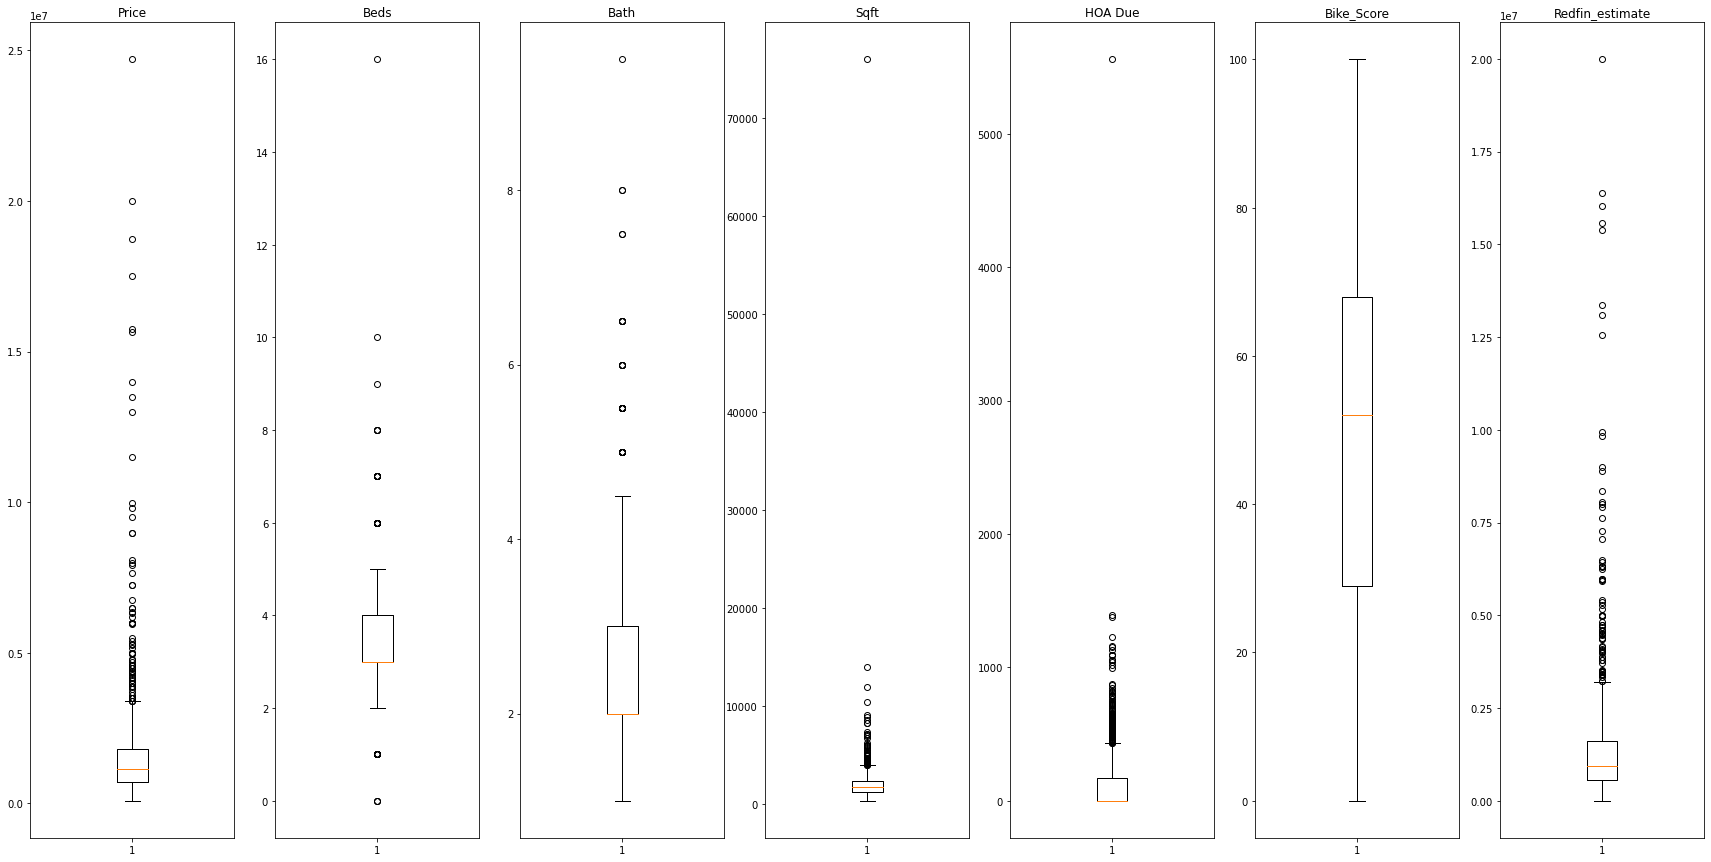

In [82]:
#Detecting Outliers
# Drawing box plots for all numerical variables before removing outliers
import matplotlib.pyplot as plt
# Define the variables of interest
variables = ['Price', 'Beds', 'Bath', 'Sqft', 'HOA Due', 'Bike_Score', 'Redfin_estimate']

# Create subplots for each variable
fig, axs = plt.subplots(1, len(variables), figsize=(30,15))

# Loop over the variables and draw box plots
for i, var in enumerate(variables):
    axs[i].boxplot(df[var])
    axs[i].set_title(var)

# Show the plots
plt.show()

#### Removing outliers from a DataFrame using the interquartile range (IQR) method, and applying it to all columns of the DataFrame.

In [83]:
# Identify outliers using IQR method
def remove_outliers_iqr(df, column_list):
    for column in column_list:
        if df[column].dtype != 'object':
            Q1 = df[column].quantile(0.25)
            Q3 = df[column].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - 1.5*IQR
            upper_bound = Q3 + 1.5*IQR
            df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df

# Remove outliers from DataFrame
column_list = list(df.columns)
df = remove_outliers_iqr(df, column_list)
df

,State,County,City,Street,Zipcode,Property_Type,Status,Price,Year_Built,Beds,Bath,Sqft,Lot Area,HOA Due,School_rating,WalkScore,Bike_Score,Garage_availability,Redfin_estimate
0,Ca,Sonoma-county,Santa rosa,1830 leafgreen dr,95405,Single family residential,Active,750000.0,1961,3.0,2.0,1425.0,7022.0,0.0,6,58,57.0,Yes,752455.0
5,Ca,Sonoma-county,Petaluma,214 jacquelyn ln,94952,Single family residential,Active,1425000.0,2010,4.0,2.5,3141.0,7148.0,0.0,8,32,13.0,Yes,1431730.0
6,Ca,Sonoma-county,Rohnert park,4579 harmony pl,94928,Single family residential,Active,700000.0,1986,3.0,2.0,1470.0,4500.0,0.0,6,30,64.0,Yes,701179.0
10,Ca,Sonoma-county,Petaluma,1619 northstar dr,94954,Single family residential,Active,700000.0,1986,3.0,2.5,1421.0,4400.0,69.0,7,52,47.0,Yes,700119.0
13,Ca,Sonoma-county,Santa rosa,336 pythian rd,95409,Single family residential,Active,995000.0,1978,3.0,2.0,2029.0,8281.0,113.0,7,11,33.0,Yes,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1058,Ca,Alameda-county,Livermore,976 desconsado ave,94550,Single family residential,New,1195000.0,1978,3.0,2.0,1753.0,9500.0,0.0,7,52,77.0,Yes,1211421.0
1059,Ca,Alameda-county,Hayward,2020 hill ave,94541,Single family home,Active,1298888.0,1963,4.0,3.0,2444.0,13939.2,0.0,4,67,30.0,Yes,1307848.0
1061,Ca,Alameda-county,Hayward,1575 172nd ave,94541,Single family residential,New,729000.0,1949,4.0,2.5,1400.0,4400.0,0.0,3,68,31.0,Yes,732612.0
1065,Ca,Alameda-county,Castro valley,5022 beacon hill dr,94552,Single family residential,New,1950000.0,1970,4.0,2.5,3194.0,10880.0,0.0,9,43,25.0,Yes,1953566.0


#### Creating box plots for Quantitative variables in a DataFrame after removing outliers, and Displaying them in Subplots.

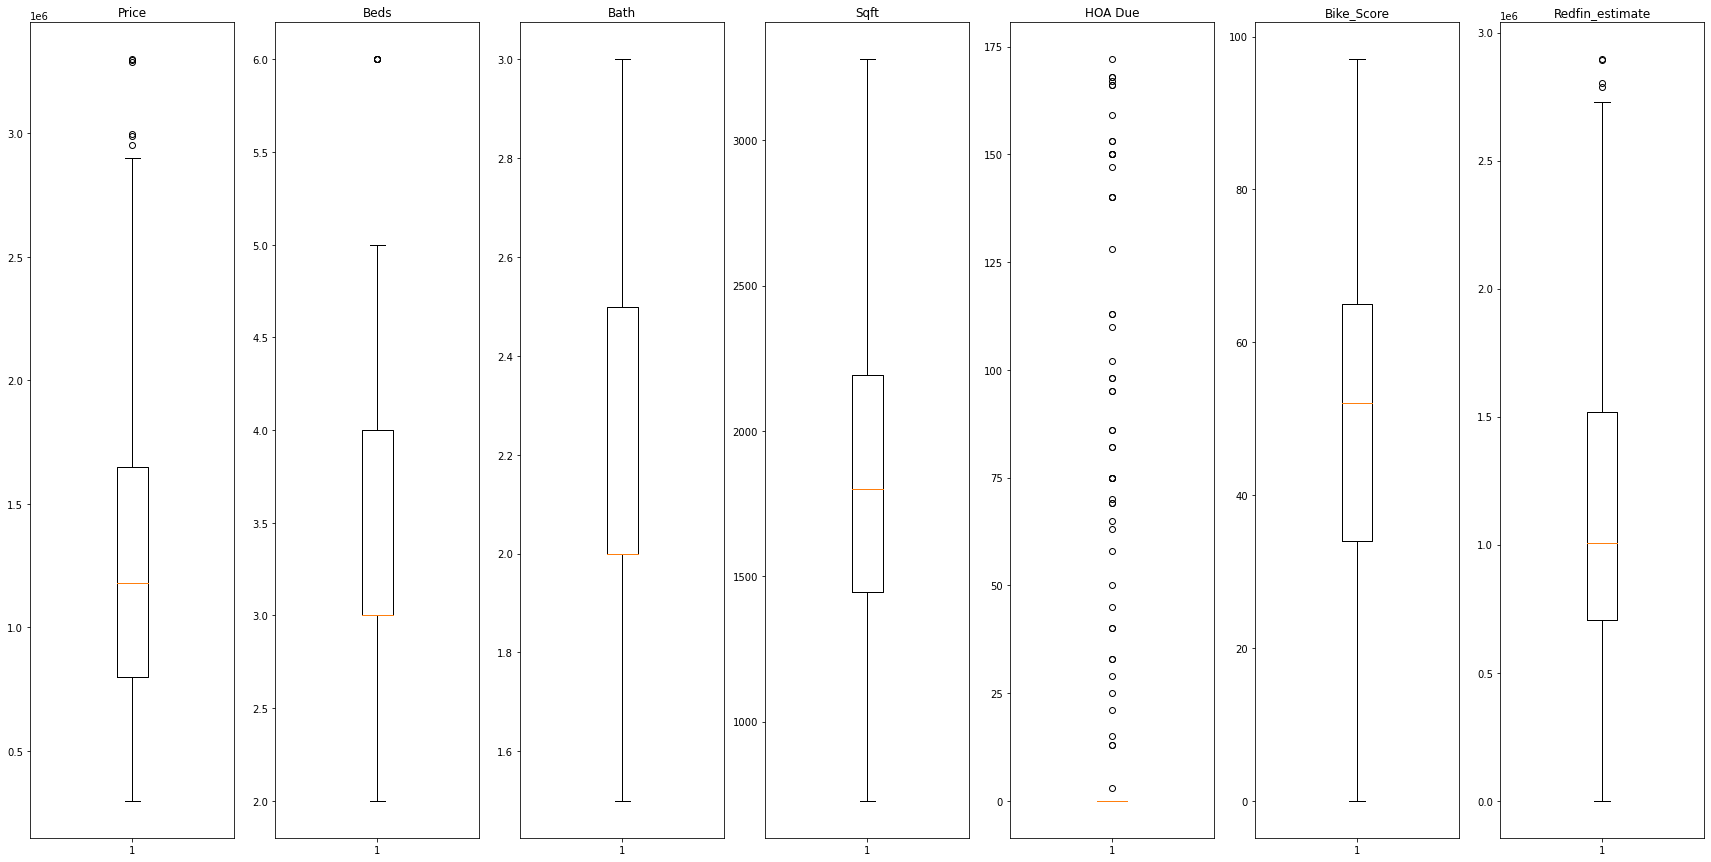

In [87]:
# Boxplot after removing outliers
# Create subplots for each variable
fig, axs = plt.subplots(1, len(variables), figsize=(30,15))

# Loop over the variables and draw box plots
for i, var in enumerate(variables):
    axs[i].boxplot(df[var])
    axs[i].set_title(var)

# Show the plots
plt.show()

#### Exporting the DataFrame after cleaning in .csv file

In [88]:
# Exporting to csv
df.to_csv('Dataset_AfterDataCleaningFinal.csv',index=False)
df

,State,County,City,Street,Zipcode,Property_Type,Status,Price,Year_Built,Beds,Bath,Sqft,Lot Area,HOA Due,School_rating,WalkScore,Bike_Score,Garage_availability,Redfin_estimate
0,Ca,Sonoma-county,Santa rosa,1830 leafgreen dr,95405,Single family residential,Active,750000.0,1961,3.0,2.0,1425.0,7022.0,0.0,6,58,57.0,Yes,752455.0
5,Ca,Sonoma-county,Petaluma,214 jacquelyn ln,94952,Single family residential,Active,1425000.0,2010,4.0,2.5,3141.0,7148.0,0.0,8,32,13.0,Yes,1431730.0
6,Ca,Sonoma-county,Rohnert park,4579 harmony pl,94928,Single family residential,Active,700000.0,1986,3.0,2.0,1470.0,4500.0,0.0,6,30,64.0,Yes,701179.0
10,Ca,Sonoma-county,Petaluma,1619 northstar dr,94954,Single family residential,Active,700000.0,1986,3.0,2.5,1421.0,4400.0,69.0,7,52,47.0,Yes,700119.0
13,Ca,Sonoma-county,Santa rosa,336 pythian rd,95409,Single family residential,Active,995000.0,1978,3.0,2.0,2029.0,8281.0,113.0,7,11,33.0,Yes,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1058,Ca,Alameda-county,Livermore,976 desconsado ave,94550,Single family residential,New,1195000.0,1978,3.0,2.0,1753.0,9500.0,0.0,7,52,77.0,Yes,1211421.0
1059,Ca,Alameda-county,Hayward,2020 hill ave,94541,Single family home,Active,1298888.0,1963,4.0,3.0,2444.0,13939.2,0.0,4,67,30.0,Yes,1307848.0
1061,Ca,Alameda-county,Hayward,1575 172nd ave,94541,Single family residential,New,729000.0,1949,4.0,2.5,1400.0,4400.0,0.0,3,68,31.0,Yes,732612.0
1065,Ca,Alameda-county,Castro valley,5022 beacon hill dr,94552,Single family residential,New,1950000.0,1970,4.0,2.5,3194.0,10880.0,0.0,9,43,25.0,Yes,1953566.0
